In [2]:
import sys
sys.path.insert(0, '../tools')

%load_ext prov_magics
import provn
import versioned_prov

# Versioned-PROV

## Names, literals, and constants

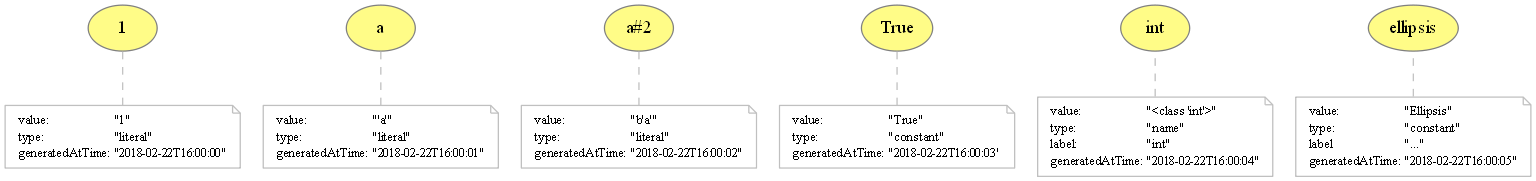

In [3]:
%%provn -o ../versioned_prov/names -e png svg pdf provn
entity(1, [value="1", type="literal", generatedAtTime="2018-02-22T16:00:00"])
entity(a, [value="'a'", type="literal", generatedAtTime="2018-02-22T16:00:01"])
entity(a#2, [value="b'a'", type="literal", generatedAtTime="2018-02-22T16:00:02"])
entity(True, [value="True", type="constant", generatedAtTime="2018-02-22T16:00:03"])
entity(int, [value="<class 'int'>", type="name", label="int", generatedAtTime="2018-02-22T16:00:04"])
entity(ellipsis, [value="Ellipsis", type="constant", label="...", generatedAtTime="2018-02-22T16:00:05"])

## Assignment

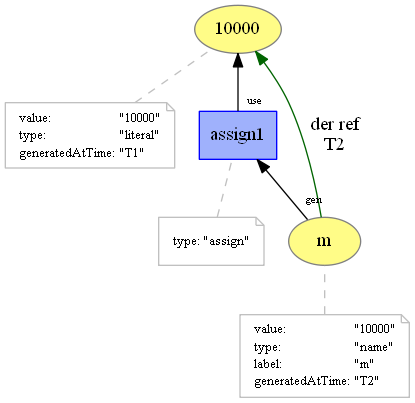

In [11]:
%%provn -o ../versioned_prov/assign -e png svg pdf provn
entity(10000, [value="10000", type="literal", generatedAtTime="T1"])
entity(m, [value="10000", type="name", label="m", generatedAtTime="T2"])

activity(assign1, [type="assign"])
used(u1; assign1, 10000, -)
wasGeneratedBy(g1; m, assign1, -)
referenceDerivedFrom(m, 10000, assign1, g1, u1, T2)

## Operation

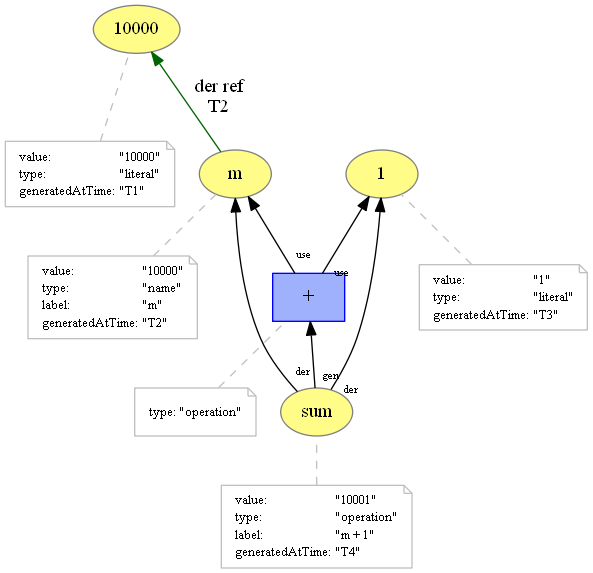

In [12]:
%%provn -o ../versioned_prov/operation -e png svg pdf provn
// previous
entity(10000, [value="10000", type="literal", generatedAtTime="T1"])
entity(m, [value="10000", type="name", label="m", generatedAtTime="T2"])
referenceDerivedFrom(m, 10000, -, -, -, T2)

// new
entity(1, [value="1", type="literal",  generatedAtTime="T3"])
entity(sum, [value="10001", type="operation", label="m + 1", generatedAtTime="T4"])

activity(+, [type="operation"])
used(u2; +, m, -)
used(u3; +, 1, -)
wasGeneratedBy(g2; sum, +, -)
wasDerivedFrom(sum, m, +, g2, u2)
wasDerivedFrom(sum, 1, +, g3, u3)

## List definition

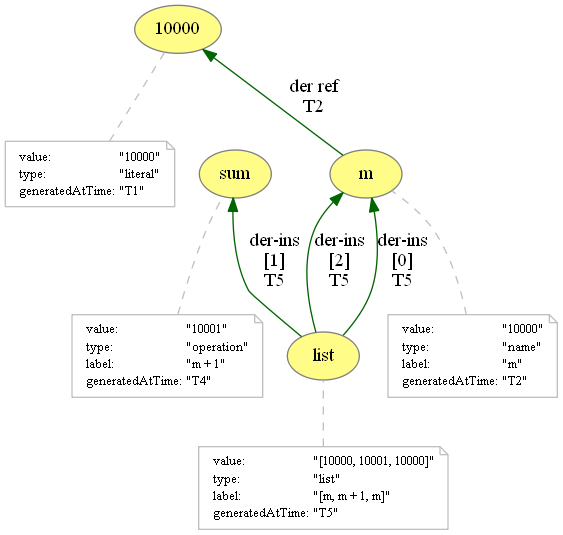

In [13]:
%%provn -o ../versioned_prov/list -e png svg pdf provn
// previous
entity(10000, [value="10000", type="literal", generatedAtTime="T1"])
entity(m, [value="10000", type="name", label="m", generatedAtTime="T2"])
referenceDerivedFrom(m, 10000, -, -, -, T2)
entity(sum, [value="10001", type="operation", label="m + 1", generatedAtTime="T4"])

// new
entity(list, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]", generatedAtTime="T5"])
derivedByInsertion(list, {("0", m), ("1", sum), ("2", m)}, T5)

## Assignment of list definition

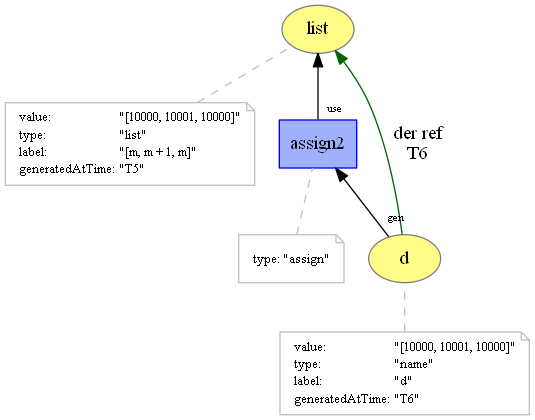

In [14]:
%%provn -o ../versioned_prov/list_assign -e png svg pdf provn
// previous
entity(list, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]", generatedAtTime="T5"])

// new entities
entity(d, [value="[10000, 10001, 10000]", type="name", label="d", generatedAtTime="T6"])

activity(assign2, [type="assign"])
used(u7; assign2, list, -)
wasGeneratedBy(g7; d, assign2, -)
referenceDerivedFrom(d, list, assign2, g7, u7, T6)

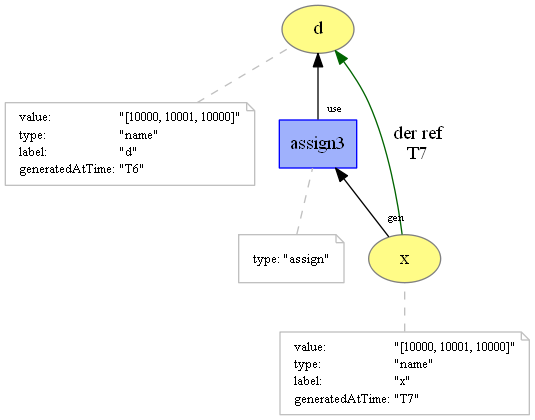

In [15]:
%%provn -o ../versioned_prov/list_assign2 -e png svg pdf provn
// old entities from previous figure
entity(d, [value="[10000, 10001, 10000]", type="name", label="d", generatedAtTime="T6"])

// new entities
entity(x, [value="[10000, 10001, 10000]", type="name", label="x", generatedAtTime="T7"])

activity(assign3, [type="assign"])
used(u8; assign3, d, -)
wasGeneratedBy(g8; x, assign3, -)
referenceDerivedFrom(x, d, assign3, g8, u8, T7)

## Function call

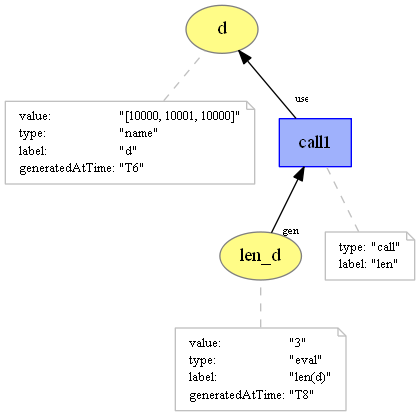

In [16]:
%%provn -o ../versioned_prov/call -e png svg pdf provn
// previous
entity(d, [value="[10000, 10001, 10000]", type="name", label="d", generatedAtTime="T6"])

// new
entity(len_d, [value="3", type="eval", label="len(d)", generatedAtTime="T8"])

activity(call1, [type="call", label="len"])
used(call1, d, -)
wasGeneratedBy(len_d, call1, -)

## Access to part of structure

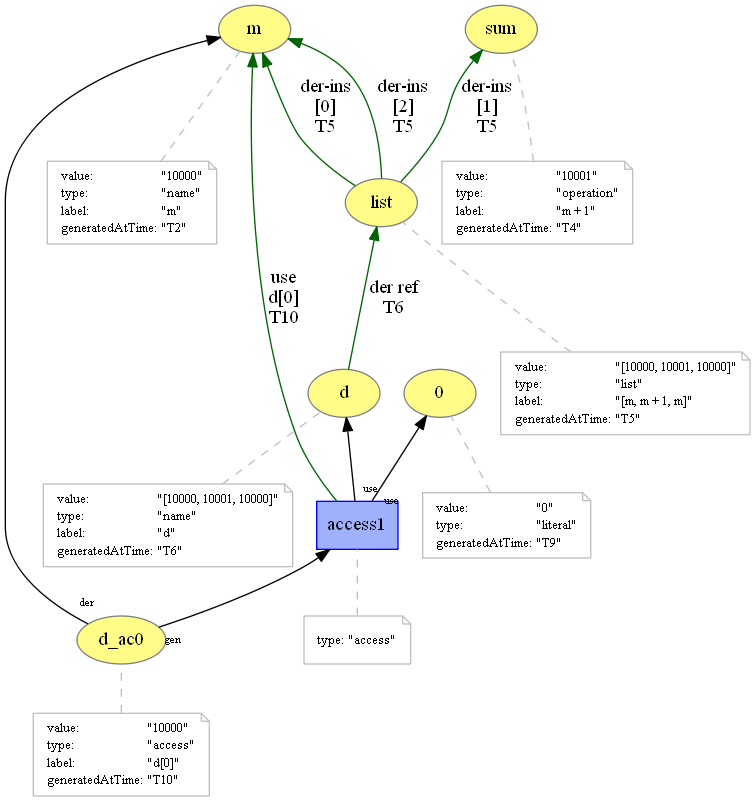

In [17]:
%%provn -o ../versioned_prov/access -e png svg pdf provn
//previous
entity(m, [value="10000", type="name", label="m", generatedAtTime="T2"])
entity(sum, [value="10001", type="operation", label="m + 1", generatedAtTime="T4"])

entity(list, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]", generatedAtTime="T5"])
derivedByInsertion(list, {("0", m), ("1", sum), ("2", m)}, T5)

entity(d, [value="[10000, 10001, 10000]", type="name", label="d", generatedAtTime="T6"])
referenceDerivedFrom(d, list, -, -, -, T6)


//access
entity(0, [value="0", type="literal", generatedAtTime="T9"])

entity(d_ac0, [value="10000", type="access", label="d[0]", generatedAtTime="T10"])


activity(access1, [type="access"])
used(access1, d, -)
used(access1, 0, -)
usedPart(u9; access1, m, "0", d, T10)
wasGeneratedBy(g9; d_ac0, access1, -)
wasDerivedFrom(d_ac0, m, access1, g9, u9)

## Assignment to part of structure

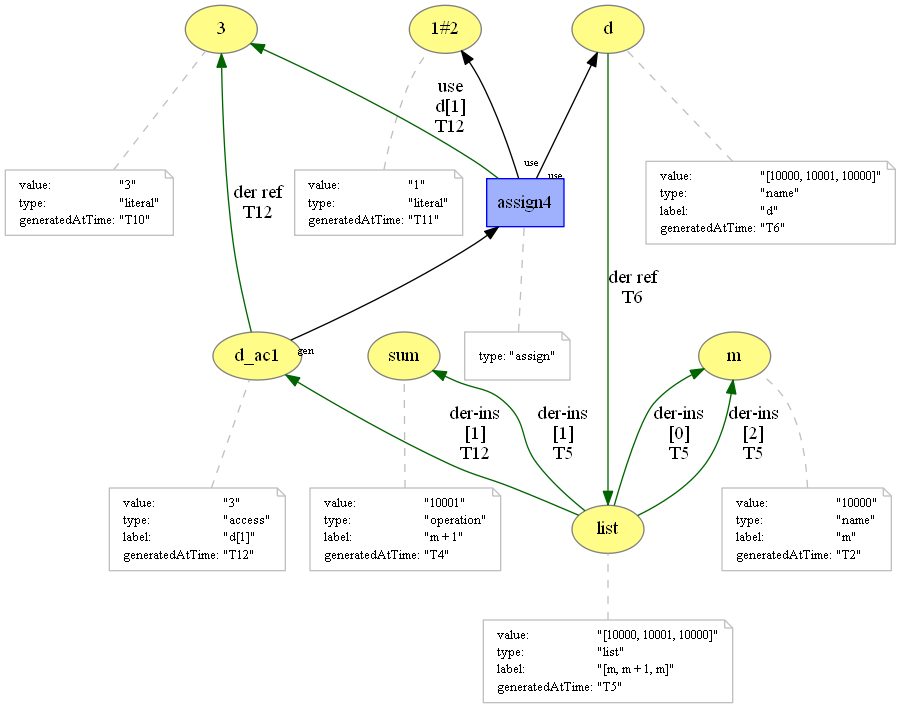

In [19]:
%%provn -o ../versioned_prov/part_assign -e png svg pdf provn
//previous
entity(m, [value="10000", type="name", label="m", generatedAtTime="T2"])
entity(sum, [value="10001", type="operation", label="m + 1", generatedAtTime="T4"])

entity(list, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]", generatedAtTime="T5"])
derivedByInsertion(list, {("0", m), ("1", sum), ("2", m)}, T5)

entity(d, [value="[10000, 10001, 10000]", type="name", label="d", generatedAtTime="T6"])
referenceDerivedFrom(d, list, -, -, -, T6)


//part assign
entity(3, [value="3", type="literal", generatedAtTime="T10"])
entity(1#2, [value="1", type="literal", generatedAtTime="T11"])

entity(d_ac1, [value="3", type="access", label="d[1]", generatedAtTime="T12"])
derivedByInsertion(list, {("1", d_ac1)}, T12)

activity(assign4, [type="assign"])
used(assign4, d, -)
used(assign4, 1#2, -)
usedPart(u10; assign4, 3, "1", d, T12)
wasGeneratedBy(g10; d_ac1, assign4, -)
referenceDerivedFrom(d_ac1, 3, assign4, g10, u10, T12)

## Full

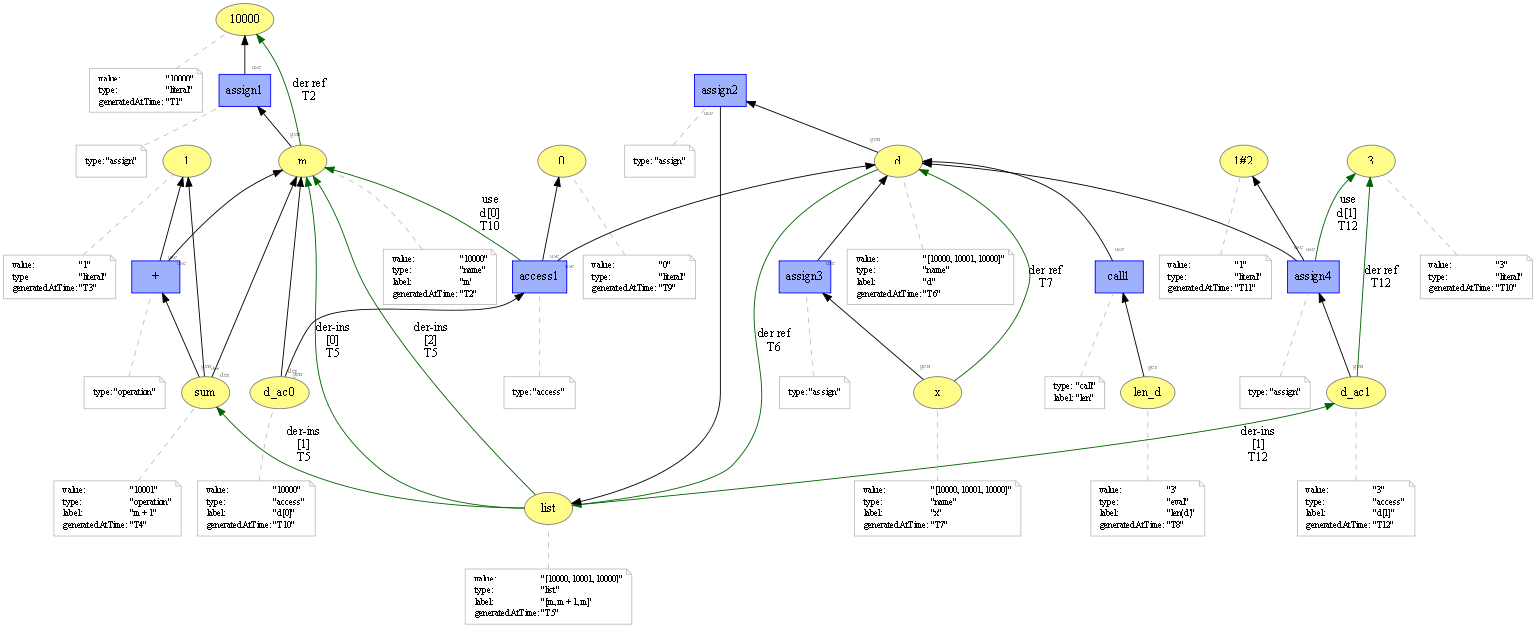

In [20]:
%%provn -o ../versioned_prov/full -e png svg pdf provn
// assignment
entity(10000, [value="10000", type="literal", generatedAtTime="T1"])
entity(m, [value="10000", type="name", label="m", generatedAtTime="T2"])

activity(assign1, [type="assign"])
used(u1; assign1, 10000, -)
wasGeneratedBy(g1; m, assign1, -)
referenceDerivedFrom(m, 10000, assign1, g1, u1, T2)

// operation
entity(1, [value="1", type="literal",  generatedAtTime="T3"])
entity(sum, [value="10001", type="operation", label="m + 1", generatedAtTime="T4"])

activity(+, [type="operation"])
used(u2; +, m, -)
used(u3; +, 1, -)
wasGeneratedBy(g2; sum, +, -)
wasDerivedFrom(sum, m, +, g2, u2)
wasDerivedFrom(sum, 1, +, g3, u3)

// list def
entity(list, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]", generatedAtTime="T5"])
derivedByInsertion(list, {("0", m), ("1", sum), ("2", m)}, T5)

// list assign
entity(d, [value="[10000, 10001, 10000]", type="name", label="d", generatedAtTime="T6"])

activity(assign2, [type="assign"])
used(u7; assign2, list, -)
wasGeneratedBy(g7; d, assign2, -)
referenceDerivedFrom(d, list, assign2, g7, u7, T6)

// list assign x
entity(x, [value="[10000, 10001, 10000]", type="name", label="x", generatedAtTime="T7"])

activity(assign3, [type="assign"])
used(u8; assign3, d, -)
wasGeneratedBy(g8; x, assign3, -)
referenceDerivedFrom(x, d, assign3, g8, u8, T7)

// call
entity(len_d, [value="3", type="eval", label="len(d)", generatedAtTime="T8"])

activity(call1, [type="call", label="len"])
used(call1, d, -)
wasGeneratedBy(len_d, call1, -)

// part access
entity(0, [value="0", type="literal", generatedAtTime="T9"])

entity(d_ac0, [value="10000", type="access", label="d[0]", generatedAtTime="T10"])


activity(access1, [type="access"])
used(access1, d, -)
used(access1, 0, -)
usedPart(u9; access1, m, "0", d, T10)
wasGeneratedBy(g9; d_ac0, access1, -)
wasDerivedFrom(d_ac0, m, access1, g9, u9)

// part assign
entity(3, [value="3", type="literal", generatedAtTime="T10"])
entity(1#2, [value="1", type="literal", generatedAtTime="T11"])

entity(d_ac1, [value="3", type="access", label="d[1]", generatedAtTime="T12"])
derivedByInsertion(list, {("1", d_ac1)}, T12)

activity(assign4, [type="assign"])
used(assign4, d, -)
used(assign4, 1#2, -)
usedPart(u10; assign4, 3, "1", d, T12)
wasGeneratedBy(g10; d_ac1, assign4, -)
referenceDerivedFrom(d_ac1, 3, assign4, g10, u10, T12)